In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display

In [5]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')


In [6]:
movie_ratings = pd.merge(movies, ratings, on='movieId')


In [7]:
mean_ratings = movie_ratings.groupby(['movieId', 'title'])['rating'].mean().reset_index()


In [8]:
ratings_pivot = movie_ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)


In [9]:
movie_similarity = cosine_similarity(ratings_pivot)


In [10]:
def get_recommendations(movie_title, movie_similarity, mean_ratings):
    idx = mean_ratings[mean_ratings['title'] == movie_title].index[0]
    sim_scores = list(enumerate(movie_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:11]]
    return mean_ratings.iloc[sim_indices]['title']


TOP 10 RECOMMENDATION : 
                                  title    rating  movieId
438         Next Karate Kid, The (1994)  2.366667      502
318               I Love Trouble (1994)  2.687500      360
295  What's Eating Gilbert Grape (1993)  3.766234      337
548                Moll Flanders (1996)  3.000000      650
580                      Flipper (1996)  3.050000      711
299             Double Happiness (1994)  4.000000      341
514                 Pretty Woman (1990)  3.485185      597
493           Bhaji on the Beach (1993)  3.500000      568
14              Cutthroat Island (1995)  3.000000       15
510    Silence of the Lambs, The (1991)  4.161290      593


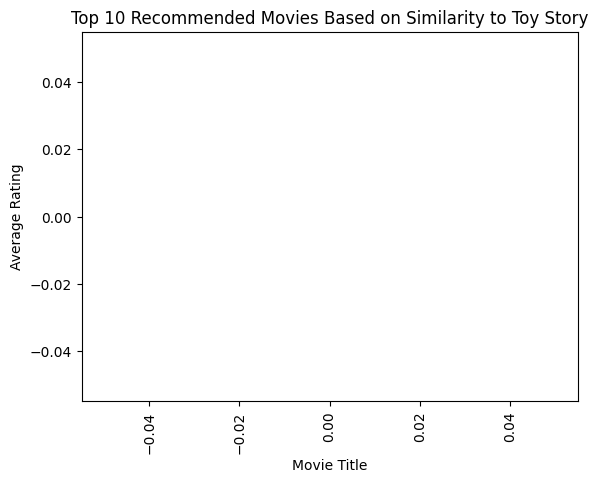

In [13]:
print("TOP 10 RECOMMENDATION : ")
recommended_movies = get_recommendations('Lamerica (1994)', movie_similarity, mean_ratings)
print(recommended_movies)

import matplotlib.pyplot as plt
recommended_ratings = mean_ratings[mean_ratings['title'].isin(recommended_movies)]
recommended_ratings = recommended_ratings.set_index('title')['rating']

plt.bar(recommended_ratings.index, recommended_ratings.values)

plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title('Top 10 Recommended Movies Based on Similarity to Toy Story')

plt.xticks(rotation=90)
plt.show()

In [12]:
movie_ratings = pd.merge(movies, ratings, on='movieId')
mean_ratings = movie_ratings.groupby(['movieId', 'title'])['rating'].mean().reset_index()
ratings_pivot = movie_ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)
movie_similarity = cosine_similarity(ratings_pivot)

movie_titles = list(movies['title'])

movie_dropdown = widgets.Dropdown(options=movie_titles, description='Select a movie:')


def get_recommendations(movie_title, movie_similarity, mean_ratings):
    idx = mean_ratings[mean_ratings['title'] == movie_title].index[0]
    sim_scores = list(enumerate(movie_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:11]]
    return mean_ratings.iloc[sim_indices][['title', 'rating', 'movieId']]

def show_recommendations(movie_title):
    recommended_movies = get_recommendations(movie_title, movie_similarity, mean_ratings)
    recommended_ratings = mean_ratings[mean_ratings['title'].isin(recommended_movies['title'])]
    recommended_ratings = recommended_ratings.set_index('title')['rating'].sort_values(ascending=False)[:10]
    ax = recommended_ratings.plot(kind='bar', rot=90)
    ax.set_xlabel('Movie Title')
    ax.set_ylabel('Average Rating')
    ax.set_title(f'Top 10 Recommended Movies Based on Similarity to {movie_title}')
    plt.show()

widgets.interactive(show_recommendations, movie_title=movie_dropdown)

interactive(children=(Dropdown(description='Select a movie:', options=('Toy Story (1995)', 'Jumanji (1995)', '…